In [163]:
# Python Notebook for PHYS 321B Computational Assignment #2

import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from matplotlib import rc
import scipy as sp

# extra stuff to make the plots look nice:

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

params = {"text.usetex" : True,
          "font.family" : "serif",
          "font.serif" : ["cmr10"],
          "font.size": 20
         }
plt.rcParams.update(params)
plt.rcParams['axes.formatter.use_mathtext'] = True

import os
os.environ["PATH"]
os.environ["PATH"] += os.pathsep + '/Library/TeX/texbin/'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'

# Set tick parameters using rcParams
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['xtick.minor.size'] = 4
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['ytick.minor.size'] = 4
plt.rcParams['xtick.major.width'] = 0.7
plt.rcParams['xtick.minor.width'] = 0.7
plt.rcParams['ytick.major.width'] = 0.7
plt.rcParams['ytick.minor.width'] = 0.7

plt.rcParams['font.weight'] = 'bold'


#### 1. In this assignment I want you to explore the effect of time-step size on numerical approximation of solution to differential equations.
The simplest algorithm that you can use to update a coordinate is:
$$
q(t_i+1) = q(t_i) + q'(t_i)\delta t
$$
$$
q'(t_i+1) = q'(t_i) + q''(t_i)\delta t 
$$
and the Euler-Lagrange equations of motion give q''.

You can ‘improve’ this algorithm by updating the coordinate using a
constant acceleration approximation:

$$
q(t_i+1) = q(t_i) + q'(t_i)\delta t + \frac{1}{2}q''(t_i)\delta t^2
$$

$$
q'(t_i+1) = q'(t_i) + q''(t_i)\delta t 
$$

In each case the way you would implement this is to have arrays of
appropriate length representing q and q′, known initial values, and
then populate the subsequent values using a ‘for’ loop.

Using the equations of motion you calculated in question 1 of the
assignment, find θ(t) over 5 oscillation given the starting conditions
$$
\theta(0) = \frac{\pi}{4}
$$
and 

$$
\theta ' (0) = 0 
$$
using the first algorithm and time steps which
are :
$$
\frac{1}{20}, \frac{1}{200}, \frac{1}{2000}, \frac{1}{20000}
$$
of the period. Comment on the impact of
changing the time step.

Repeat using the second algorithm, and comment on the difference in
results between the two algorithms.

Repeat again using the x equations of motion, and check that they
give the same behaviour as the θ ones.

Make some appropriate graphs that showcase what you see.

In general you should submit your code, the plot it produces, and a brief
explanation of what you did.

#### We can start by writing down the equations on motion for both $\theta$ and $x$:

For $\theta$:

$$ 
\ddot{\theta} = -\frac{g}{\ell}sin\theta
$$

With initial conditions such that:

$$
\theta (0) = \frac{\pi}{4}; \ \ \dot{\theta}(0) = 0
$$


For x:

$$
\ddot{x} = -\frac{gx(\ell^2-x^2)^{1/2}}{\ell^2} - \frac{x\dot{x}}{(\ell^2 -x^2)}
$$

We know that $x = \ell sin\theta$ so that $\dot{x} = \ell cos(\theta) \dot{\theta}$. When $t=0$:

$$
x = \ell sin(\frac{\pi}{4}) = \frac{\sqrt{2}}{2} \ell; \ \ \dot{x} = 0
$$

We may now begin the problem. Can rewrite the equations of the algorithm in terms of $\theta$:

$$
\theta (t_{i+1}) = \theta (t_i) + \theta ' (t_i) \delta t 
$$

$$
\theta ' (t_{i+1}) = \theta ' (t_i) + \theta '' (t_i) \delta t 
$$

The period of a simple pendulum can be calculated with the expression:

$$
T = 2\pi \sqrt{\frac{\ell}{g}}
$$

In [278]:
# We start first with the first order algorithm:

# length of rope: will set to 1 m

ell = 1; g = 9.81 #m/s^2

# parameters of the problem:

period = 2*np.pi * np.sqrt(ell/g); time_steps = np.array([1/20, 1/200, 1/2000, 1/20000]) *period


theta_0 = np.pi / 4 ; theta_p0 = 0 # initial conditions

x_0 = np.sqrt(2)/2 * ell; x_p0 = 0 # initial conditions


# we can define a function that will implement the algorithm for an arbitrary timestep:

def first_order_alg_theta(TS, N, th0=theta_0, thp0 = theta_p0, g=g, ell=ell):
    '''
    Takes a time step TS, a number of 
    iterations N, a value for the two
    initial conditions and constants
    t0, tp0, g, ell 
    and returns a time and angle array
    for the pendulum evolution
    '''
    
    # initializes the arrays:
    
    thetas = np.zeros(N)
    theta_primes = np.zeros(N)
    ts = np.zeros(N)
    
    # iterates N times:
    for i in range(len(thetas)):
    
        # for first element of the arrays, use initial conditions:
        if i==0:
            # implements algorithm
            thet = th0 + thp0 * TS
            thet_p = thp0 - (g/ell) *np.sin(th0)* TS
            
            # adds new values to arrays
            thetas[i] = thet
            theta_primes[i] = thet_p
            ts[i]=0
        
        # for all others use the last iteration values to find next:
        else:
            # implements algorithm
            thet = thetas[i-1] + theta_primes[i-1] * TS
            thet_p = theta_primes[i-1] - (g/ell) *np.sin(thetas[i-1])* TS
            
            # adds new values to arrays
            thetas[i] = thet
            theta_primes[i] = thet_p
            ts[i] = i * TS
        
    return ts, thetas        


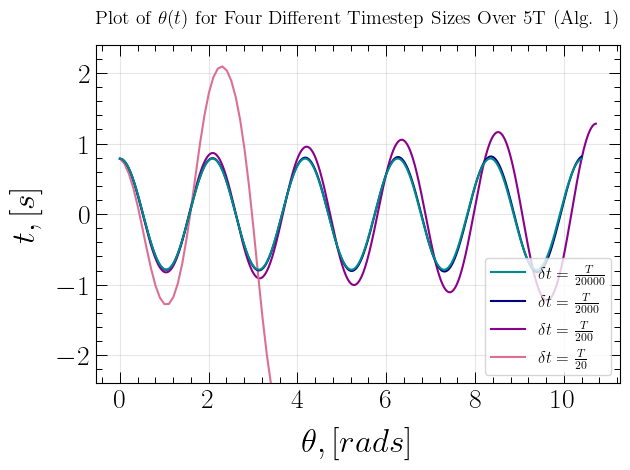

In [279]:
# calculates the time and angle arrays for the four timesteps:


t_20k, theta_20k = first_order_alg_theta(time_steps[3],103700)
t_2k,  theta_2k =  first_order_alg_theta(time_steps[2],10370)
t_200, theta_200 = first_order_alg_theta(time_steps[1],1070)
t_20,  theta_20 =  first_order_alg_theta(time_steps[0],100)

# initiates plotting parameters
width=8;height=6;ff, ax1 = plt.subplots(1,1);ff.set_figwidth(width);ff.set_figheight(height);ff.tight_layout(pad=4.0)

# labels
ax1.set_title(r"Plot of $\theta (t)$ for Four Different Timestep Sizes Over 5T (Alg. 1)", pad = 15, fontsize=14)
ax1.set_ylabel(r"$t, [s]$",labelpad =10, fontsize=24)
ax1.set_xlabel(r"$\theta, [rads]$",labelpad =10,fontsize=24)

# actual plots:

ax1.plot(t_20k, theta_20k, c='darkcyan',label=r"$\delta t = \frac{T}{20000}$",zorder=5)
ax1.plot(t_2k,  theta_2k, c='navy',label=r"$\delta t = \frac{T}{2000}$", zorder=3)
ax1.plot(t_200, theta_200,c='darkmagenta', label=r"$\delta t = \frac{T}{200}$")
ax1.plot(t_20,  theta_20,c='palevioletred', label=r"$\delta t = \frac{T}{20}$")

# ticks and legend:
ax1.yaxis.set_major_locator(MultipleLocator(1));ax1.yaxis.set_minor_locator(MultipleLocator(0.2))
ax1.xaxis.set_major_locator(MultipleLocator(2));ax1.xaxis.set_minor_locator(MultipleLocator(0.4))
ax1.tick_params(axis='both', direction="in")
ax1.tick_params(which="minor", axis="x", direction="in")
ax1.tick_params(which="minor", axis="y", direction="in")
ax1.xaxis.set_ticks_position('both') 
ax1.yaxis.set_ticks_position('both')
ax1.grid(True, alpha=0.3, zorder=10)
ax1.legend( prop={'size': 12}, loc='lower right')
ax1.set_ylim(-2.4,2.4)
ax1.grid(True)
plt.show()


#### Comments on the impact of changing the time step for $\tehat:

Clearly for insufficiently small timesteps, the first algorithm has trouble converging to the true solutions. For $\delta t = \frac{T}{20}$, the solution diverges completely while the next larger step is unstable but still oscillatory. Once the timestep becomes appropriately small, we converge to the expected solution for the final two time step sizes with only marginal differences between them.

In [280]:
# we know with to implement a more complicated algorithm using similar techniques.

def second_order_alg_theta(TS, N, th0=theta_0, thp0 = theta_p0, g=g, ell=ell):
    '''
    Takes a time step TS, a number of 
    iterations N, a value for the two
    initial conditions and constants
    t0, tp0, g, ell 
    and returns a time and angle array
    for the pendulum evolution
    '''
    
    # initializes the arrays:
    
    thetas = np.zeros(N)
    theta_primes = np.zeros(N)
    ts = np.zeros(N)
    
    # iterates N times:
    for i in range(len(thetas)):
    
        # for first element of the arrays, use initial conditions:
        if i==0:
            # implements algorithm #2 ! Change from first function here
            thet = th0 + thp0 * TS + (1/2)*(g/ell) *np.sin(th0) * (TS**2)
            thet_p = thp0 - (g/ell) *np.sin(th0)* TS
            
            # adds new values to arrays
            thetas[i] = thet
            theta_primes[i] = thet_p
            ts[i]=0
        
        # for all others use the last iteration values to find next:
        else:
            # implements algorithm #2 ! Change from first function here
            thet = thetas[i-1] + theta_primes[i-1] * TS + (1/2)*(g/ell) *np.sin(thetas[i-1]) * (TS**2)
            thet_p = theta_primes[i-1] - (g/ell) *np.sin(thetas[i-1])* TS
            
            # adds new values to arrays
            thetas[i] = thet
            theta_primes[i] = thet_p
            ts[i] = i * TS
        
    return ts, thetas        


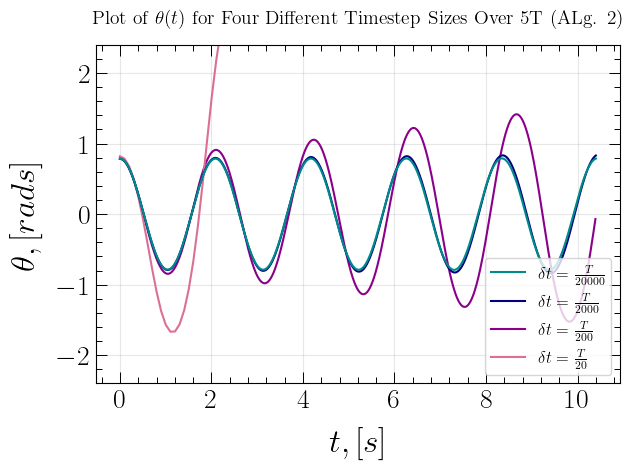

In [281]:
# calculates the time and angle arrays for the four timesteps:


t_20k_2, theta_20k_2 = second_order_alg_theta(time_steps[3],103700)
t_2k_2,  theta_2k_2 =  second_order_alg_theta(time_steps[2],10370)
t_200_2, theta_200_2 = second_order_alg_theta(time_steps[1],1037)
t_20_2,  theta_20_2  =  second_order_alg_theta(time_steps[0],104)

# initiates plotting parameters
width=8;height=6;ff, ax1 = plt.subplots(1,1);ff.set_figwidth(width);ff.set_figheight(height);ff.tight_layout(pad=4.0)

# labels
ax1.set_title(r"Plot of $\theta (t)$ for Four Different Timestep Sizes Over 5T (Alg. 2)", pad = 15, fontsize=14)
ax1.set_xlabel(r"$t, [s]$",labelpad =10, fontsize=24)
ax1.set_ylabel(r"$\theta, [rads]$",labelpad =10,fontsize=24)

# actual plots:

ax1.plot(t_20k_2, theta_20k_2, c='darkcyan',label=r"$\delta t = \frac{T}{20000}$",zorder=5)
ax1.plot(t_2k_2,  theta_2k_2, c='navy',label=r"$\delta t = \frac{T}{2000}$", zorder=3)
ax1.plot(t_200_2, theta_200_2,c='darkmagenta', label=r"$\delta t = \frac{T}{200}$")
ax1.plot(t_20_2,  theta_20_2,c='palevioletred', label=r"$\delta t = \frac{T}{20}$")

# ticks and legend:
ax1.yaxis.set_major_locator(MultipleLocator(1));ax1.yaxis.set_minor_locator(MultipleLocator(0.2))
ax1.xaxis.set_major_locator(MultipleLocator(2));ax1.xaxis.set_minor_locator(MultipleLocator(0.4))
ax1.tick_params(axis='both', direction="in")
ax1.tick_params(which="minor", axis="x", direction="in")
ax1.tick_params(which="minor", axis="y", direction="in")
ax1.xaxis.set_ticks_position('both') 
ax1.yaxis.set_ticks_position('both')
ax1.grid(True, alpha=0.3, zorder=10)
ax1.legend( prop={'size': 12}, loc='lower right')
ax1.set_ylim(-2.4,2.4)
ax1.grid(True)
plt.show()

#### Comments on the impact of changing the time step for $\theta$ algorithm 2:

We achieve a very similar result to algorithm 1. In this case the larger timesteps actual converge worse than in the first iteration with the period on $\delta t = \frac{T}{200}$ become more different from the two converged solutions. Also $\delta t = \frac{T}{20}$ blows up even faster.



#### now we wish to do it with x:

The equations of motion we are trying to solve are given by:

$$
\ddot{x} = -\frac{gx(\ell^2-x^2)^{1/2}}{\ell^2} - \frac{x\dot{x}^2}{(\ell^2-x^2)}
$$

To check if our expressions are equal, we may use the following relation $\textit{after}$ solving the DE numerically:

$$
sin \theta = \frac{x}{\ell} \longrightarrow \theta = sin^{-1} \frac{x}{\ell}
$$

In [346]:
# our initial conditions are:

x_0 = np.sqrt(2)/2 * ell; x_p0 = 0 # initial conditions

def first_order_alg_x(TS, N, x0=x_0, xp0 = x_p0, g=g, ell=ell):
    '''
    Takes a time step TS, a number of 
    iterations N, a value for the two
    initial conditions and constants
    x0, xp0, g, ell 
    and returns a time and position array
    for the pendulum evolution
    '''
    
    # initializes the arrays:
    
    xs = np.zeros(N)
    xps = np.zeros(N)
    ts = np.zeros(N)
    
    # iterates N times:
    for i in range(len(xs)):
    
        # for first element of the arrays, use initial conditions:
        if i==0:
            # implements algorithm
            xi = x0 + xp0 * TS
            xpi = xp0 - ((g/(ell*2))*x0*((ell**2 - x0**2)**(0.5)) - (x0 * xp0 *xp0)/(ell**2 - x0**2))*TS
            
            # adds new values to arrays
            xs[i] = xi
            xps[i] = xpi
            ts[i]=0
        
        # for all others use the last iteration values to find next:
        else:
            # implements algorithm
            xi = xs[i-1] + xps[i-1] * TS
            xpi = xps[i-1] - ((g/(ell*2))*xs[i-1]*((ell**2 - xs[i-1]**2)**(0.5)) 
                              - (xs[i-1] *( xps[i-1]**2))/(ell**2 - xs[i-1]**2))*TS
            
            # adds new values to arrays
            xs[i] = xi
            xps[i] = xpi
            ts[i] = i * TS * 3/5
        
    return ts, xs       

# function to change x to theta:

def x_to_theta(x, g=g, ell=ell):
    
    theta = np.arcsin((x/ell))
    
    return theta

x_to_t = np.vectorize(x_to_theta)

# function to change theta to x:

def theta_to_x(thet, g=g, ell=ell):
    
    x = np.sin((thet))*ell
    
    return x

t_to_x = np.vectorize(theta_to_x)

/var/folders/_4/c4v1yztx1fsb4299y_1flv100000gn/T/ipykernel_72762/3027001333.py:39: RuntimeWarning: invalid value encountered in scalar power
  xpi = xps[i-1] - ((g/(ell*2))*xs[i-1]*((ell**2 - xs[i-1]**2)**(0.5))


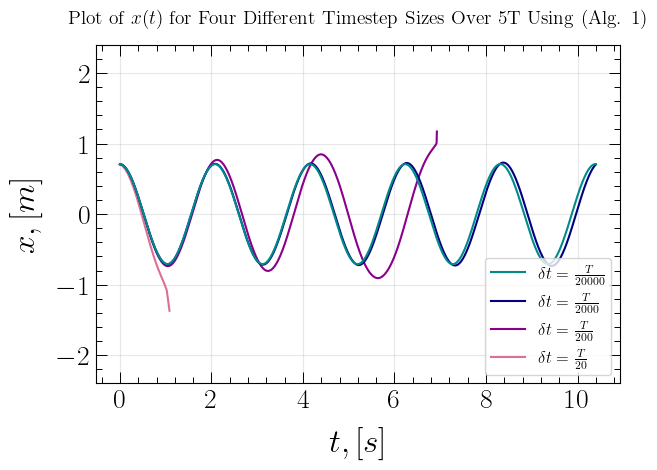

In [347]:
# calculates the time and x arrays for the four timesteps:

tx_20k, x_20k=  first_order_alg_x(time_steps[3],int(103700*(5/3)))
tx_2k,  x_2k =   first_order_alg_x(time_steps[2],int(10370*(5/3)))
tx_200, x_200 =  first_order_alg_x(time_steps[1],int(1037*(5/3)))
tx_20,  x_20  =  first_order_alg_x(time_steps[0],int(104*(5/3)))

# initiates plotting parameters
width=8;height=6;ff, ax1 = plt.subplots(1,1);ff.set_figwidth(width);ff.set_figheight(height);ff.tight_layout(pad=4.0)

# labels
ax1.set_title(r"Plot of $x (t)$ for Four Different Timestep Sizes Over 5T Using (Alg. 1)", pad = 15, fontsize=14)
ax1.set_xlabel(r"$t, [s]$",labelpad =10, fontsize=24)
ax1.set_ylabel(r"$x, [m]$",labelpad =10,fontsize=24)

# actual plots:

ax1.plot(tx_20k, (x_20k), c='darkcyan',label=r"$\delta t = \frac{T}{20000}$",zorder=5)
ax1.plot(tx_2k,  (x_2k), c='navy',label=r"$\delta t = \frac{T}{2000}$", zorder=3)
ax1.plot(tx_200, (x_200),c='darkmagenta', label=r"$\delta t = \frac{T}{200}$")
ax1.plot(tx_20,  (x_20),c='palevioletred', label=r"$\delta t = \frac{T}{20}$")

# ticks and legend:
ax1.yaxis.set_major_locator(MultipleLocator(1));ax1.yaxis.set_minor_locator(MultipleLocator(0.2))
ax1.xaxis.set_major_locator(MultipleLocator(2));ax1.xaxis.set_minor_locator(MultipleLocator(0.4))
ax1.tick_params(axis='both', direction="in")
ax1.tick_params(which="minor", axis="x", direction="in")
ax1.tick_params(which="minor", axis="y", direction="in")
ax1.xaxis.set_ticks_position('both') 
ax1.yaxis.set_ticks_position('both')
ax1.grid(True, alpha=0.3, zorder=10)
ax1.legend( prop={'size': 12}, loc='lower right')
ax1.set_ylim(-2.4,2.4)
ax1.grid(True)
plt.show()

In [348]:
def second_order_alg_x(TS, N, x0=x_0, xp0 = x_p0, g=g, ell=ell):
    '''
    Takes a time step TS, a number of 
    iterations N, a value for the two
    initial conditions and constants
    x0, xp0, g, ell 
    and returns a time and position array
    for the pendulum evolution
    '''
    
    # initializes the arrays:
    
    xs = np.zeros(N)
    xps = np.zeros(N)
    ts = np.zeros(N)
    
    # iterates N times:
    for i in range(len(xs)):
    
        # for first element of the arrays, use initial conditions:
        if i==0:
            # implements algorithm #2 ! Changes are here
            xi = x0 + xp0 * TS -0.5*((g/(ell*2))*x0*((ell**2 - x0**2)**(0.5)) 
                                     - (x0 * xp0 *xp0)/(ell**2 - x0**2))*(TS**2)
            xpi = xp0 - ((g/(ell*2))*x0*((ell**2 - x0**2)**(0.5)) - (x0 * xp0 *xp0)/(ell**2 - x0**2))*TS
            
            # adds new values to arrays
            xs[i] = xi
            xps[i] = xpi
            ts[i]=0
        
        # for all others use the last iteration values to find next:
        else:
            # implements algorithm
            xi = xs[i-1] + xps[i-1] * TS- 0.5*((g/(ell*2))*xs[i-1]*((ell**2 - xs[i-1]**2)**(0.5)) 
                              - (xs[i-1] *( xps[i-1]**2))/(ell**2 - xs[i-1]**2))*(TS**2)
            xpi = xps[i-1] - ((g/(ell*2))*xs[i-1]*((ell**2 - xs[i-1]**2)**(0.5)) 
                              - (xs[i-1] *( xps[i-1]**2))/(ell**2 - xs[i-1]**2))*TS
            
            # adds new values to arrays
            xs[i] = xi
            xps[i] = xpi
            ts[i] = i * TS * 3/5
        
    return ts, xs       


/var/folders/_4/c4v1yztx1fsb4299y_1flv100000gn/T/ipykernel_72762/2065951576.py:35: RuntimeWarning: invalid value encountered in scalar power
  xi = xs[i-1] + xps[i-1] * TS- 0.5*((g/(ell*2))*xs[i-1]*((ell**2 - xs[i-1]**2)**(0.5))
/var/folders/_4/c4v1yztx1fsb4299y_1flv100000gn/T/ipykernel_72762/2065951576.py:37: RuntimeWarning: invalid value encountered in scalar power
  xpi = xps[i-1] - ((g/(ell*2))*xs[i-1]*((ell**2 - xs[i-1]**2)**(0.5))


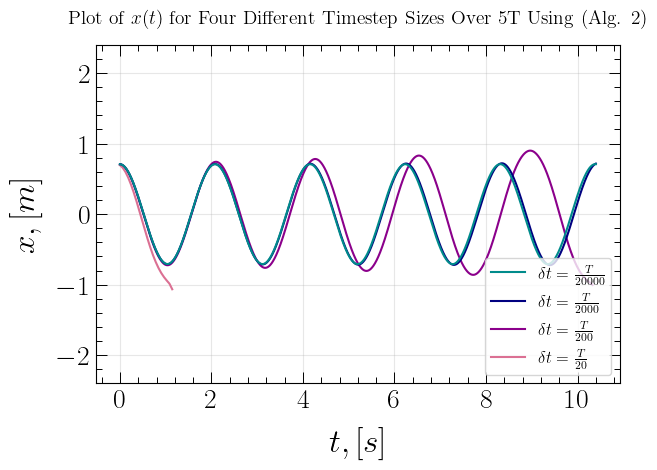

In [349]:
# calculates the time and x arrays for the four timesteps:

tx_20k_2, x_20k_2 =  second_order_alg_x(time_steps[3],int(103700*(5/3)))
tx_2k_,  x_2k_2 =    second_order_alg_x(time_steps[2],int(10370*(5/3)))
tx_200_2, x_200_2 =  second_order_alg_x(time_steps[1],int(1037*(5/3)))
tx_20_2,  x_20_2  =  second_order_alg_x(time_steps[0],int(104*(5/3)))

# initiates plotting parameters
width=8;height=6;ff, ax1 = plt.subplots(1,1);ff.set_figwidth(width);ff.set_figheight(height);ff.tight_layout(pad=4.0)

# labels
ax1.set_title(r"Plot of $x (t)$ for Four Different Timestep Sizes Over 5T Using (Alg. 2)", pad = 15, fontsize=14)
ax1.set_xlabel(r"$t, [s]$",labelpad =10, fontsize=24)
ax1.set_ylabel(r"$x, [m]$",labelpad =10,fontsize=24)

# actual plots:

ax1.plot(tx_20k_2, (x_20k_2), c='darkcyan',label=r"$\delta t = \frac{T}{20000}$",zorder=5)
ax1.plot(tx_2k_2,  (x_2k_2), c='navy',label=r"$\delta t = \frac{T}{2000}$", zorder=3)
ax1.plot(tx_200_2, (x_200_2),c='darkmagenta', label=r"$\delta t = \frac{T}{200}$")
ax1.plot(tx_20_2,  (x_20_2),c='palevioletred', label=r"$\delta t = \frac{T}{20}$")

# ticks and legend:
ax1.yaxis.set_major_locator(MultipleLocator(1));ax1.yaxis.set_minor_locator(MultipleLocator(0.2))
ax1.xaxis.set_major_locator(MultipleLocator(2));ax1.xaxis.set_minor_locator(MultipleLocator(0.4))
ax1.tick_params(axis='both', direction="in")
ax1.tick_params(which="minor", axis="x", direction="in")
ax1.tick_params(which="minor", axis="y", direction="in")
ax1.xaxis.set_ticks_position('both') 
ax1.yaxis.set_ticks_position('both')
ax1.grid(True, alpha=0.3, zorder=10)
ax1.legend( prop={'size': 12}, loc='lower right')
ax1.set_ylim(-2.4,2.4)
ax1.grid(True)
plt.show()

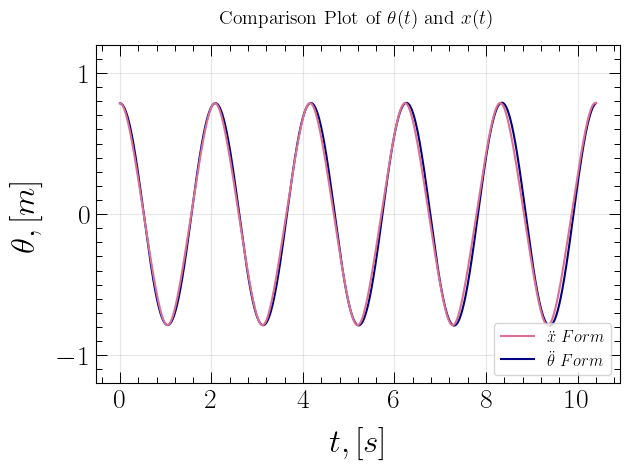

In [353]:
# now we may compare the two: will do only for converged result

# initiates plotting parameters
width=8;height=6;ff, ax1 = plt.subplots(1,1);ff.set_figwidth(width);ff.set_figheight(height);ff.tight_layout(pad=4.0)

# labels
ax1.set_title(r"Comparison Plot of $\theta (t)$ and $x(t)$", pad = 15, fontsize=14)
ax1.set_xlabel(r"$t, [s]$",labelpad =10, fontsize=24)
ax1.set_ylabel(r"$\theta, [m]$",labelpad =10,fontsize=24)

# actual plots:

ax1.plot(tx_20k_2, x_to_t(x_20k_2), c='palevioletred',label=r"$\ddot{x} \ Form$",zorder=5)
ax1.plot(t_20k_2,  (theta_20k_2), c='navy',label=r"$\ddot{\theta} \ Form$", zorder=3)

# ticks and legend:
ax1.yaxis.set_major_locator(MultipleLocator(1));ax1.yaxis.set_minor_locator(MultipleLocator(0.1))
ax1.xaxis.set_major_locator(MultipleLocator(2));ax1.xaxis.set_minor_locator(MultipleLocator(0.4))
ax1.tick_params(axis='both', direction="in")
ax1.tick_params(which="minor", axis="x", direction="in")
ax1.tick_params(which="minor", axis="y", direction="in")
ax1.xaxis.set_ticks_position('both') 
ax1.yaxis.set_ticks_position('both')
ax1.grid(True, alpha=0.3, zorder=10)
ax1.legend( prop={'size': 12}, loc='lower right')
ax1.set_ylim(-1.2,1.2)
ax1.grid(True)
plt.show()